**PREDICTION USING UNSUPERVISED ML**

**made by: Szimonetta Farkas | Data Scientist**

**Objective: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.**

**K-Means Clustering:**

K-Means Clustering is an unsupervised machine learning algorithm. As the data is without defined categories, this algorithm classifies the dataset through a certain number of clusters. Based on the features, the algorithm assigns each data point to one of the K-groups. It is based on centroid - based clustering.

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
# Loading the Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
# Finding the Optimum Number of Clusters, Determining the Value of K

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []   # within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

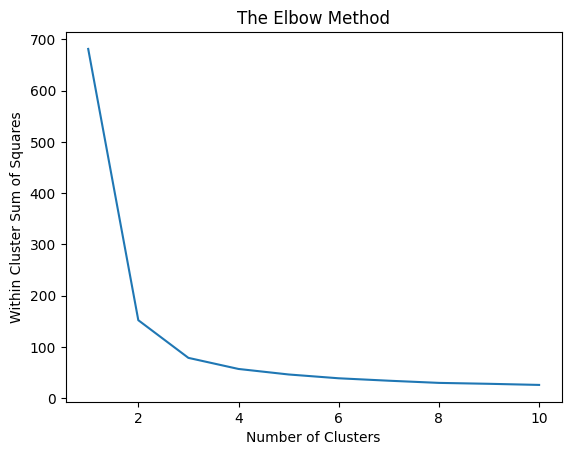

In [11]:
# Plotting the Result
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [12]:
# Applying Kmeans to the Dataset, Creating the Kmeans Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<function matplotlib.pyplot.legend(*args, **kwargs)>

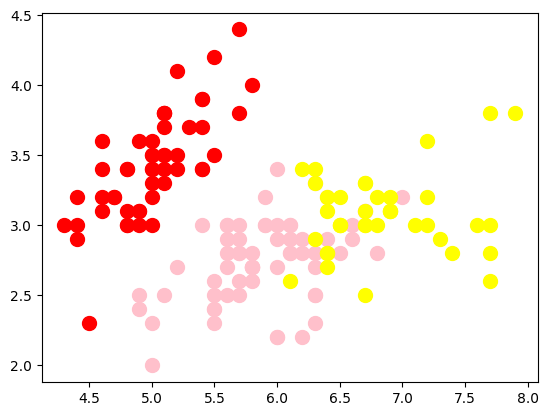

In [18]:
# Visualising the Cluster Data - On the First Two Columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.legend

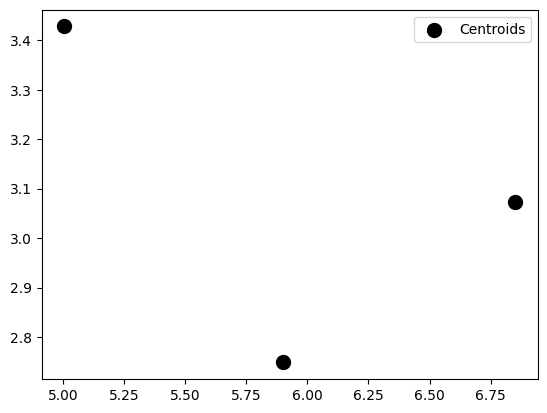

In [17]:
# Plotting the Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

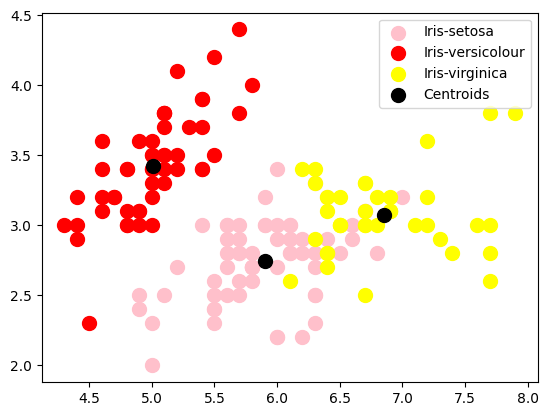

In [19]:
# Combining the 2 Graphs
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()